In [2]:
import os
work_dir = os.path.abspath('../../..')
print(work_dir)
os.chdir(work_dir)
from aiphy import Knowledge, MeasureType, Concept, Exp, Intrinsic, Expression
from aiphy.experiment.ground_laboratory import gravity_config
from aiphy.experiment.cosmos import celestial_3_config
from aiphy.dataplot import plot_datastruct, plot_data

/home/lixiang/code/ai-physicist


In [3]:
knowledge = Knowledge.default()
main_exp = celestial_3_config()
knowledge.register_expstruct('gravity', gravity_config())
knowledge.register_expstruct('celestial', main_exp)
freel = knowledge.register_expr(
    Expression("[#stringmotion0 (1->Spring) |- length[1]]"))
mass = knowledge.register_expr(
    Expression(f"[#gravity (1->Particle) |- length[2] - {freel}[2]]"))

Txy = knowledge.register_expr(
    Expression("(1 -> Particle) |- (D[posx[1]]/D[t[0]] ** 2 + D[posy[1]]/D[t[0]] ** 2)"))
sumT = knowledge.register_expr(
    Expression(f"[Sum:Particle] (1->Particle) |- {mass}[1] * {Txy}[1]"))
sumV = knowledge.register_expr(
    Expression(f"[Sum:Particle] (1->Particle) (2->Particle) |- {mass}[1]*{mass}[2]/(dist[1, 2]+dist[2, 1])"))


In [ ]:
data_T = knowledge.eval('mass[1]', main_exp)

In [3]:
exp = Exp(f"D[{sumT}]/D[{sumV}]")

In [4]:
main_exp.random_settings()
data = knowledge.eval(exp, main_exp)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/lixiang/code/ai-physicist/aiphy/interface.py", line 161, in eval
    return self.K.eval(expr, expstruct)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: No data found for [Sum:Particle] (1->Particle) |- (C_02[1] * C_03[1])

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/miniconda/envs/pubpy/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2161878/2015062576.py", line 2, in <module>
    data = knowledge.eval(exp, main_exp)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/lixiang/code/ai-physicist/aiphy/interface.py", line 163, in eval
    raise Exception(f"Failed to eval {expr}")
Exception: Failed to eval D[C_04]/D[C_05]

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/miniconda/

In [6]:
for _ in range(10):
    main_exp.random_settings()
    data = knowledge.eval(exp, main_exp)
    print(data.is_conserved)

True
True
True
True
True
True
True
True
True
True


In [4]:
data = knowledge.eval(exp, main_exp)

In [5]:
data.is_conserved

True

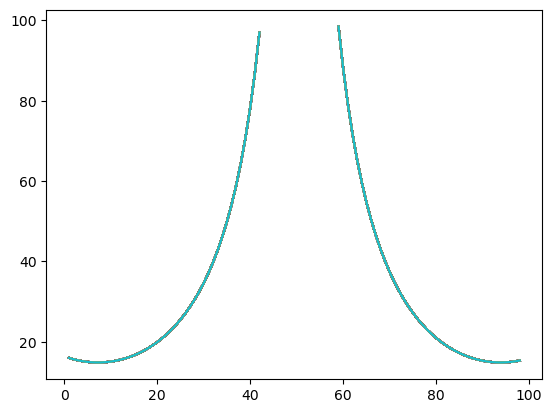

In [14]:
plot_data(data)

In [ ]:


assert knowledge.eval(exp, main_exp).is_const

G = knowledge.register_expr(Expression(f"[#celestial |- D[{sumT}]/D[dist[1,2]**(-1)] / {mass}[1] / {mass}[2]]"))

print(knowledge.eval(G, main_exp))

main_exp.random_settings()
data = knowledge.eval(f"{G}*{mass}[1]*{mass}[2]/dist[1,2] - {sumT}", main_exp)
assert data.is_const
